# Importing the Libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
# loading the csv data to a Pandas DataFrame
gold_data = pd.read_csv('gld_price_data.csv')

In [3]:
# gold_data['Date'] = pd.to_datetime(gold_data['Date'])

gold_data.drop(columns = ["Date"],inplace = True)

In [4]:
# print first 5 rows in the dataframe
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


In [5]:
# print last 5 rows of the dataframe
gold_data.tail()

,SPX,GLD,USO,SLV,EUR/USD
2285,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,2725.780029,122.543800,14.4058,15.4542,1.182033


In [6]:
# number of rows and columns
gold_data.shape

(2290, 5)

In [7]:
# getting some basic informations about the data
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   SPX      2290 non-null   float64
 1   GLD      2290 non-null   float64
 2   USO      2290 non-null   float64
 3   SLV      2290 non-null   float64
 4   EUR/USD  2290 non-null   float64
dtypes: float64(5)
memory usage: 89.6 KB


In [8]:
# checking the number of missing values
gold_data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [9]:
# getting the statistical measures of the data
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


### Correlation:
            1. positive correlation
            2. Negative correlationion

In [10]:
correlation = gold_data.corr()

<Axes: >

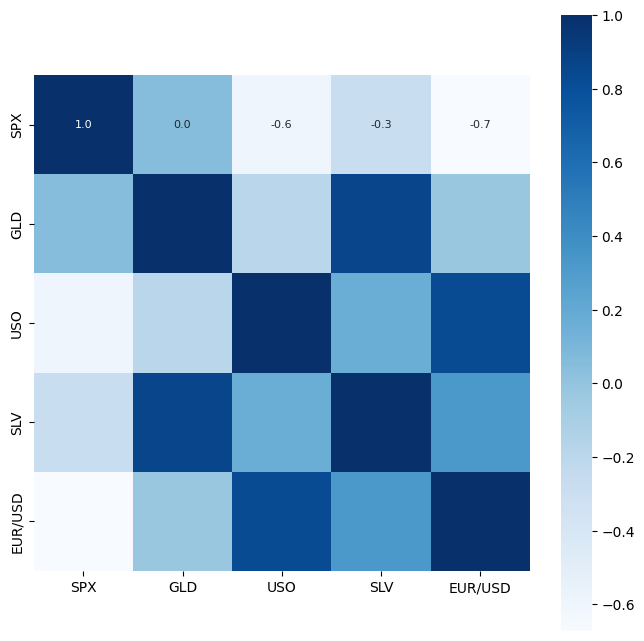

In [11]:
# constructing a heatmap to understand the correlatiom
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [12]:
# correlation values of GLD
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Axes: xlabel='GLD', ylabel='Density'>

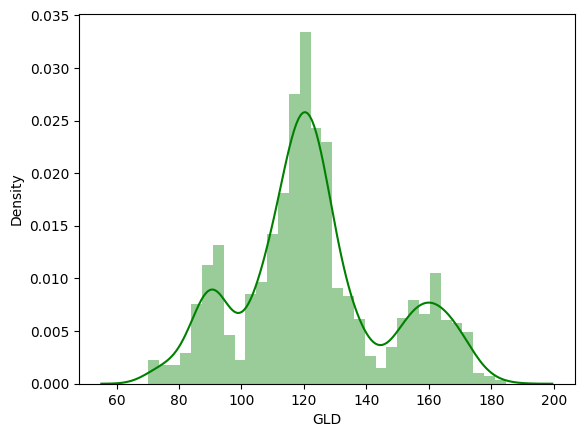

In [13]:
# checking the distribution of the GLD Price
sns.distplot(gold_data['GLD'],color='green')

In [14]:
X = gold_data.drop(['GLD'],axis=1)
Y = gold_data['GLD']

In [15]:
print(X)
     

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [16]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [17]:
# Splitting into Training data and Test Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=2)

In [18]:
regressor = RandomForestRegressor(n_estimators=100)

In [19]:
# training the model
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [20]:
# prediction on Test Data
test_data_prediction = regressor.predict(X_test)

In [21]:
print(test_data_prediction)

[168.77689942  81.8569998  115.79689986 127.53460051 120.77390122
 154.68079788 150.29179867 126.11890027 117.56699864 125.92180065
 116.86940041 171.38250075 141.80099917 167.83389803 115.21509976
 117.41980036 137.6324031  170.57500143 159.04470282 161.94150002
 155.17190042 125.17130016 175.56499933 157.20110292 125.08310047
  93.74309976  77.06710034 120.42959992 119.14879943 167.47849927
  88.06880075 125.0203999   91.18480099 117.74770021 121.10579937
 136.40170131 115.55230087 114.88370071 146.76439969 107.26360077
 104.3788027   87.08039763 126.47520041 118.03720032 151.34039921
 119.80239979 108.48610001 108.26799822  93.16770029 127.03209807
  75.57640003 113.65639928 121.32059993 111.374799   118.8233989
 120.68559903 158.46750009 168.18870084 146.81099667  85.90789874
  94.32470046  86.76479886  90.55870025 118.9816007  126.39400092
 127.54339993 169.43539913 122.21699958 117.47759877  98.57520049
 168.14300083 143.08529868 132.30720266 121.19740212 120.79979946
 119.698900

In [22]:
# R squared error
error_score = metrics.r2_score(Y_test, test_data_prediction)
print("R squared error : ", error_score)

R squared error :  0.9900022634115143


##### Compare the Actual Values and Predicted Values in a Plot

In [23]:
Y_test = list(Y_test)

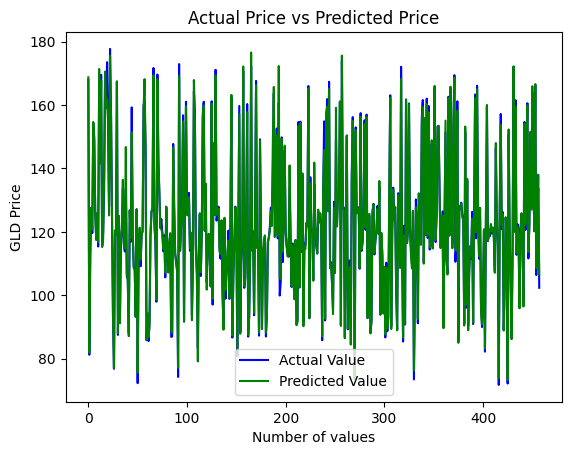

In [24]:
plt.plot(Y_test, color='blue', label = 'Actual Value')
plt.plot(test_data_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()